In [ ]:
from sklearn import datasets
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1KFHYWdYJyej-oX53q6A5dWMfly4_SO3n'}) # replace the id with id of file you want to access
downloaded.GetContentFile('noshow.csv') 

## Step 1: Reading and Understanding the Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
# Read the data from csv file

df = pd.read_csv('noshow.csv')

In [ ]:
# Check the head of the dataset
 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# checking the shape of dataframe

df.shape

(110527, 14)

In [ ]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# change columns name

new_col_name = ['patient_id', 'appointment_id','gender','schedule_day','appointment_day','age','neighborhood',
               'scholarship','hypertension','diabetes','alcoholism','handicap',
               'sms_received','no_show']
df.columns = new_col_name

In [ ]:
# change data type of some columns
df['patient_id'] = df['patient_id'].astype('int64')
df['schedule_day']= pd.to_datetime(df['schedule_day'])
df['appointment_day']= pd.to_datetime(df['appointment_day'])

In [ ]:
# checking for the null values in column data

df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
schedule_day       0
appointment_day    0
age                0
neighborhood       0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [ ]:
# dropping the duplicates

df.drop_duplicates(inplace=True)

In [ ]:
# re-verifying the shape of new dataframe

df.shape

(110527, 14)

#### As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe.

In [ ]:
df.head(5)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#Checking Descriptive Statistics
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#Inference from descriptive stats
1. Minimum Age is -1 years, which is not possible. Hence removing all the negative age values
2. Handicap is supposed to be a Boolean Variable. But the max value is 4

#Therefore dropping


1.  All negative age
2.  Handicap values over 1



In [ ]:
df.drop(df[df['age'] < 0].index, inplace =True)

In [ ]:
df[df['handicap'] > 1]['handicap'].value_counts().sum()


199

In [ ]:
#Removing the 199 feature vectors with handicap value over 1.
df.drop(df[df['handicap'] > 1].index, inplace =True)

In [ ]:
# in no_show column No means patient showed up and yes means patient did not showed up
replacement = { 'No': 'Showed up', 
              'Yes': 'not showed up'}
df['no_show'].replace(replacement, inplace = True)

In [ ]:
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed up
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed up
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed up
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed up
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed up


In [ ]:
# Setting dates to a consistent format
df['schedule_day'] = df['schedule_day'].dt.normalize()
df['appointment_day'] = df['appointment_day'].dt.normalize()

In [ ]:
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed up
1,558997776694438,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed up
2,4262962299951,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed up
3,867951213174,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed up
4,8841186448183,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed up


In [ ]:
df['wait_days'] = (df['appointment_day'] - df['schedule_day']).dt.days


In [ ]:
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,wait_days
0,29872499824296,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed up,0
1,558997776694438,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed up,0
2,4262962299951,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed up,0
3,867951213174,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed up,0
4,8841186448183,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed up,0


In [ ]:
df['wait_days'].describe()


count    110327.000000
mean         10.186971
std          15.257836
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

In [ ]:
#Wait Days cannot be negative, hence dropping feature vectors with wait days value less than 0
df.drop(df[df['wait_days'] < 0].index, inplace =True)

In [ ]:
df.shape

(110322, 15)

# A : Exploratory Data Analysis

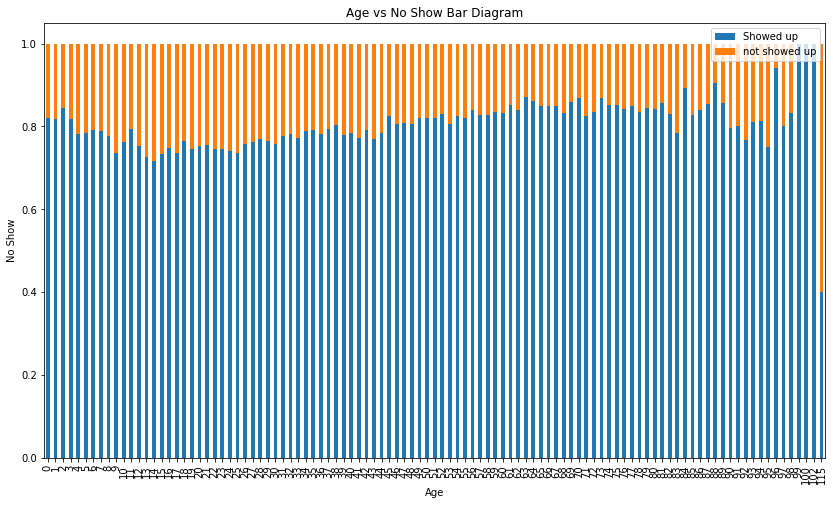

In [ ]:
#Checking relationship between age and No shows
pd.crosstab(index=df["age"], 
            columns=df["no_show"], normalize = 'index').plot(kind='bar', 
                                     stacked = True,figsize=(14,8));
plt.xlabel('Age')
plt.ylabel('No Show')
plt.title('Age vs No Show Bar Diagram')
plt.legend();

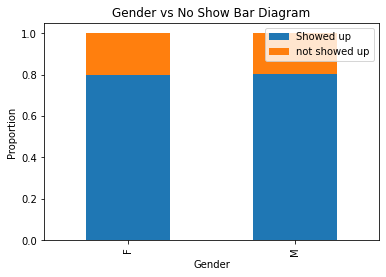

In [ ]:
# Checking relationship between gender and no shows
pd.crosstab(index=df["gender"], 
            columns=df["no_show"], normalize = 'index').plot(kind='bar', 
                                     stacked = True);
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Gender vs No Show Bar Diagram')
plt.legend();

#Inference from tables above
1. Proportion of showed up patients are higher for age above 45.
2. There is not much difference between females and males showing or not showing up for checkup



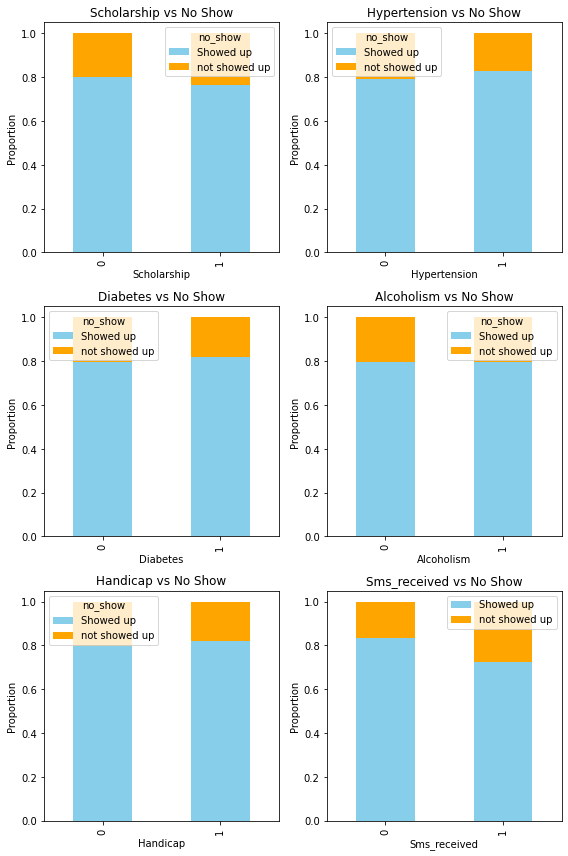

In [ ]:
#Checking relationship between the rest of the variables and no show all at once
column_plot = ['scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received']

fig = plt.figure(figsize= (8,12))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(3,2, number+1)
    axes.set_title(column.capitalize() + ' vs No Show')
    pd.crosstab(index = df[column], columns = df['no_show'],normalize = 'index').plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
    
    axes.set_xlabel(column.capitalize())
    plt.ylabel('Proportion')
plt.tight_layout() 
plt.legend();

#Inference from the tables above 

1.   Patients who recieved sms are more likely to show up than people who did not recieve sms
2.   Patients without scholarship are more likely to show up than people with scholarship



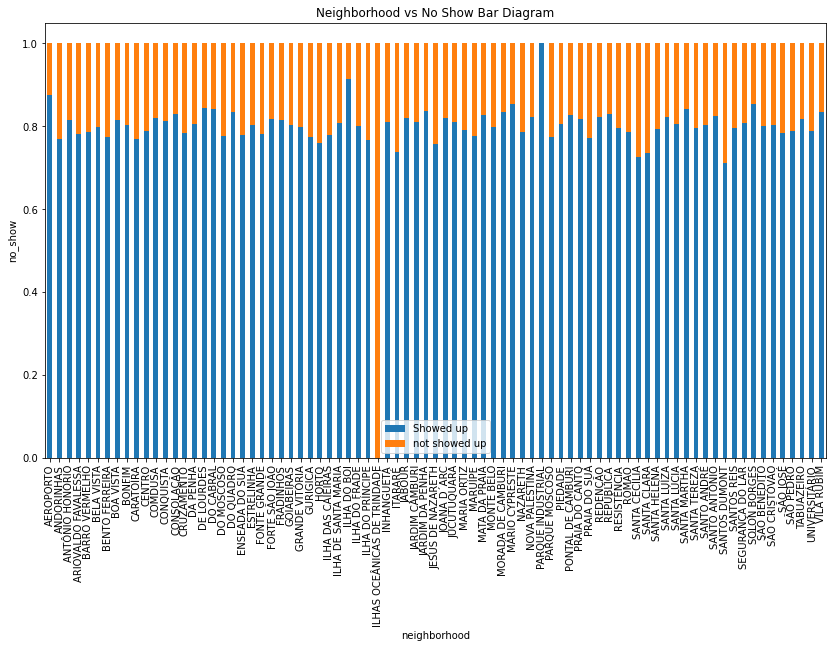

In [ ]:
# Checking relationship between neighborhood and no shows
pd.crosstab(index=df["neighborhood"], 
            columns=df["no_show"], normalize = 'index').plot(kind='bar', 
                                     stacked = True,figsize=(14,8));
plt.xlabel('neighborhood')
plt.ylabel('no_show')
plt.title('Neighborhood vs No Show Bar Diagram')
plt.legend();

Text(0, 0.5, 'Frequency')

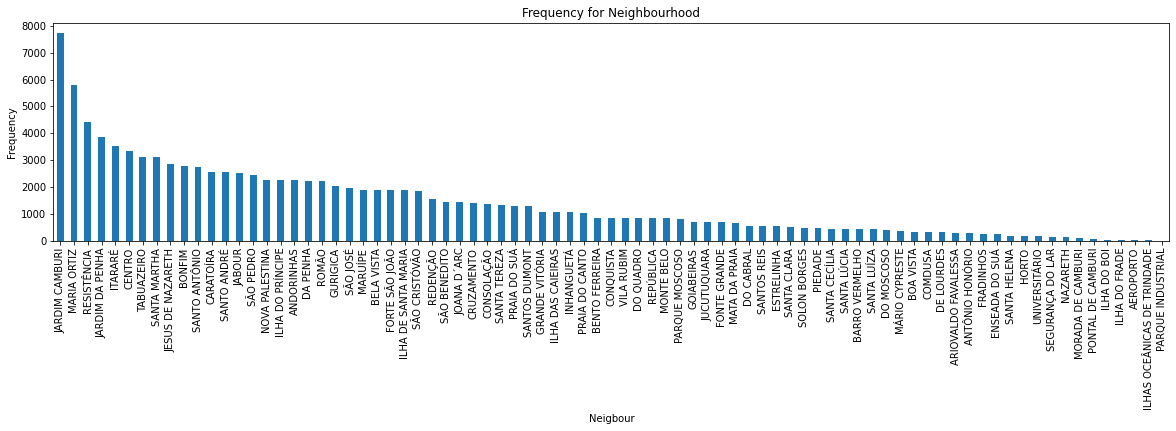

In [ ]:
ax1 = df['neighborhood'].value_counts().plot(kind='bar',
                                    figsize=(20,4),
                                    title="Frequency for Neighbourhood")
ax1.set_xlabel("Neigbour")
ax1.set_ylabel("Frequency")

#Their is a huge difference in the number of patients from each neigbourhood
1.   Therefore it would be wrong to draw conclusions from the tables above




Text(0, 0.5, 'Frequency')

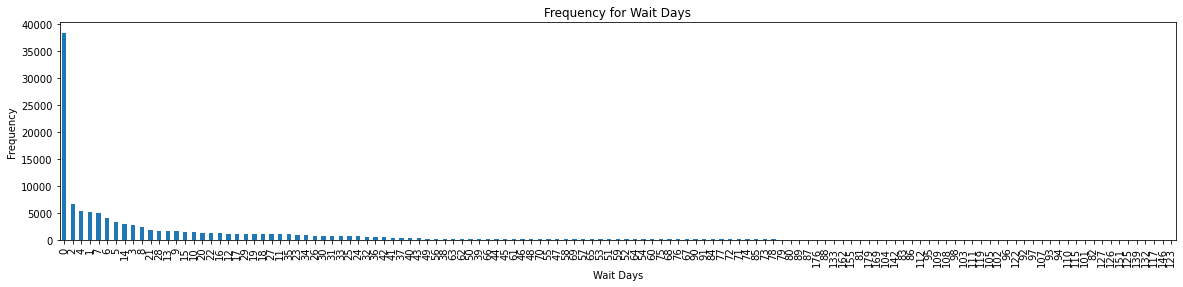

In [ ]:
ax2 = df['wait_days'].value_counts().plot(kind='bar',
                                    figsize=(20,4),
                                    title="Frequency for Wait Days")
ax2.set_xlabel("Wait Days")
ax2.set_ylabel("Frequency")

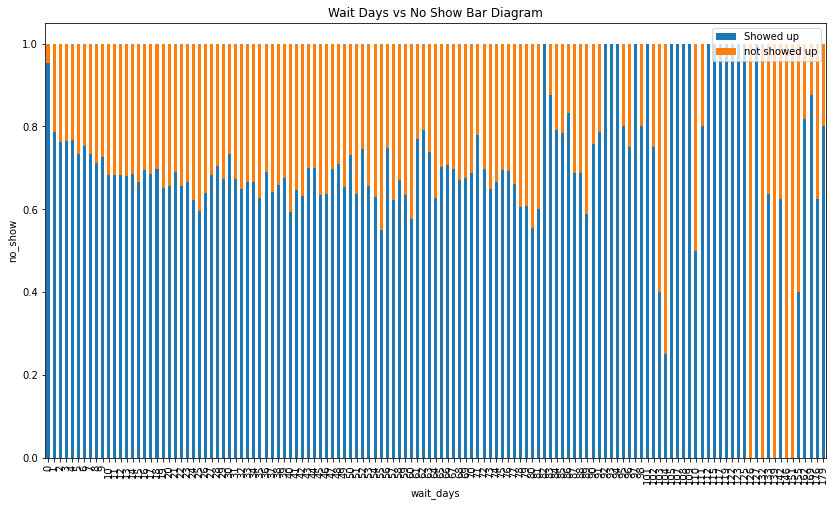

In [ ]:
# Checking relationship between neighborhood and no shows
pd.crosstab(index=df["wait_days"], 
            columns=df["no_show"], normalize = 'index').plot(kind='bar', 
                                     stacked = True,figsize=(14,8));
plt.xlabel('wait_days')
plt.ylabel('no_show')
plt.title('Wait Days vs No Show Bar Diagram')
plt.legend();

#Wait time less than 24 hours appear more times than any other value
1.   Therefore it would be wrong to make an inference from the table above

#Feature Engineering

In [ ]:
df.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,wait_days
0,29872499824296,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed up,0
1,558997776694438,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed up,0
2,4262962299951,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed up,0
3,867951213174,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed up,0
4,8841186448183,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed up,0


In [ ]:
#dropping unnecessory features
df.drop("patient_id",axis=1,inplace=True)
df.drop("appointment_id",axis=1,inplace=True)
df.drop("schedule_day",axis=1,inplace=True)
df.drop("appointment_day",axis=1,inplace=True)

In [ ]:
df.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,wait_days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed up,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed up,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Showed up,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed up,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed up,0


In [ ]:
df.gender = df.gender.map({'F':0, 'M':1})

In [ ]:
df.no_show = df.no_show.map({'not showed up':0, 'Showed up':1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_e = df.apply(le.fit_transform)

df_e.head() 

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,wait_days
0,0,62,39,0,1,0,0,0,0,1,0
1,1,56,39,0,0,0,0,0,0,1,0
2,0,62,45,0,0,0,0,0,0,1,0
3,0,8,54,0,0,0,0,0,0,1,0
4,0,56,39,0,1,1,0,0,0,1,0


In [ ]:
df_e.drop("no_show",axis=1,inplace=True)

#Splitting into Test and Train

In [ ]:
X = df_e
y = df.no_show
X.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,wait_days
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: no_show, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88257, 10)
(22065, 10)
(88257,)
(22065,)


Classification

1. **Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print('Accuracy of training set', rf.score(X_train, y_train))

Accuracy of training set 0.9648526462490228


In [ ]:
print('Accuracy of test set::', rf.score(X_test, y_test))

Accuracy of test set:: 0.7646952186721051


2. **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print('Accuracy of training set', lr.score(X_train, y_train))

Accuracy of training set 0.7944412341230724


In [ ]:
print('Accuracy of test set::', lr.score(X_test, y_test))

Accuracy of test set:: 0.7946521640607297


3.**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Accuracy of training set', dtc.score(X_train, y_train))

Accuracy of training set 0.9648753073410608


In [ ]:
print('Accuracy of test set::', dtc.score(X_test, y_test))

Accuracy of test set:: 0.7219125311579424


#Logistic Regression gives the best results for the test set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=5, n_estimators=200)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=200)

### Evaluate Model

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,8,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

#Bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.7, n_estimators = 200)

In [ ]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=200)

In [ ]:
print('Test score',bg.score(X_test,y_test))

Test score 0.7575757575757576


In [ ]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=200, 
    max_samples=0.7, 
    oob_score=True,
    random_state=0
)

In [ ]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=200, oob_score=True, random_state=0)

In [ ]:
print('Test score', bag_model.score(X_test, y_test))

Test score 0.7619047619047619


In [ ]:
print('Out of bag score',bag_model.oob_score_)

Out of bag score 0.7783985102420856



#I used bagging technique to avoid overfitting as It simultaneously trains a huge number of "strong" learners. A model that is mostly unconstrained is a powerful learner. The predictions of all the powerful learners are then "smoothed out" via bagging.



## Suggestion for Ohio Clinic


1.   Send out remainder SMS before the schedule date as it decreases chances of no show considerably

